In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from scipy import stats
import seaborn as sns
sns.set()
pd.set_option('display.max_rows' , 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
train = pd.read_csv('/Users/aryamonani/Desktop/Development/titanic/train.csv')
test = pd.read_csv('/Users/aryamonani/Desktop/Development/titanic/test.csv')

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Johnston, Mr. Andrew G",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train.shape, test.shape

((891, 12), (418, 11))

In [7]:
test.describe(include = 'all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Widener, Mr. George Dunton",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


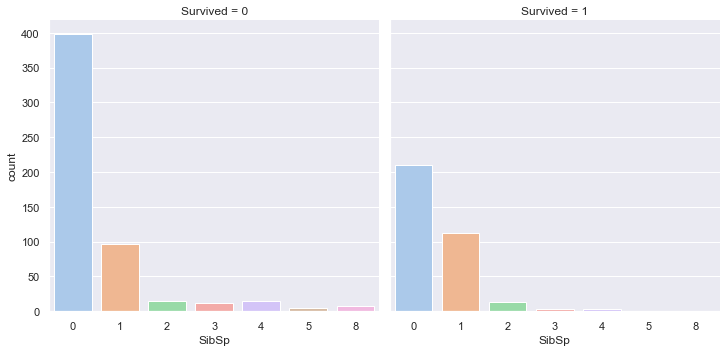

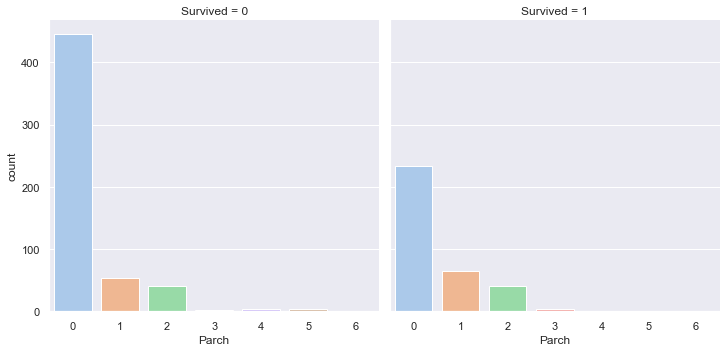

In [8]:
sns.catplot(x = 'SibSp', col = 'Survived', data = train, kind = 'count', palette = 'pastel')
sns.catplot(x = 'Parch', col = 'Survived', data = train, kind = 'count', palette = 'pastel')
plt.show()

This tells us if a passenger was accompanied by someone or not

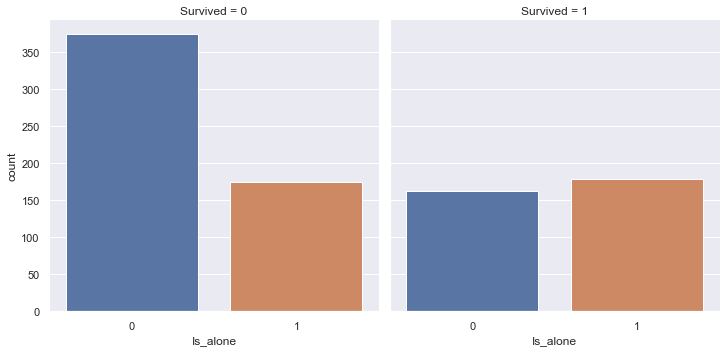

In [9]:
def is_alone(x):
    if  (x['SibSp'] + x['Parch'])  > 0:
        return 1
    else:
        return 0

train['Is_alone'] = train.apply(is_alone, axis = 1)
test['Is_alone'] = test.apply(is_alone, axis = 1)

g = sns.catplot(x="Is_alone", col = 'Survived', data=train, kind = 'count', palette='deep')

A person has a better chance of survival if he/she is alone

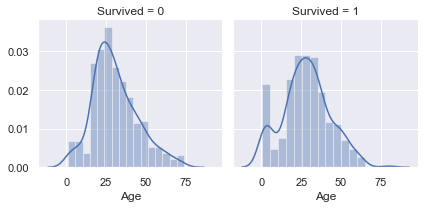

In [10]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, "Age")

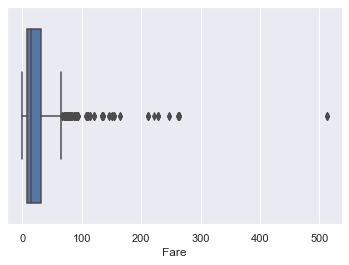

In [11]:
sns.boxplot(train['Fare'])

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


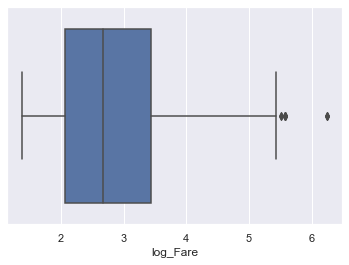

In [12]:
log_Fare = np.log(train['Fare'])
train['log_Fare'] = log_Fare
sns.boxplot(x=train['log_Fare'])

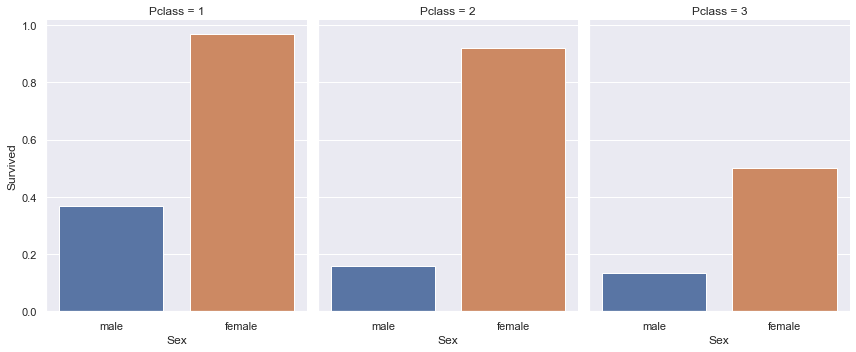

In [13]:
sns.catplot(x = 'Sex', y ='Survived', col = 'Pclass', data = train, kind = 'bar', palette = 'deep', ci=None, aspect=0.8)

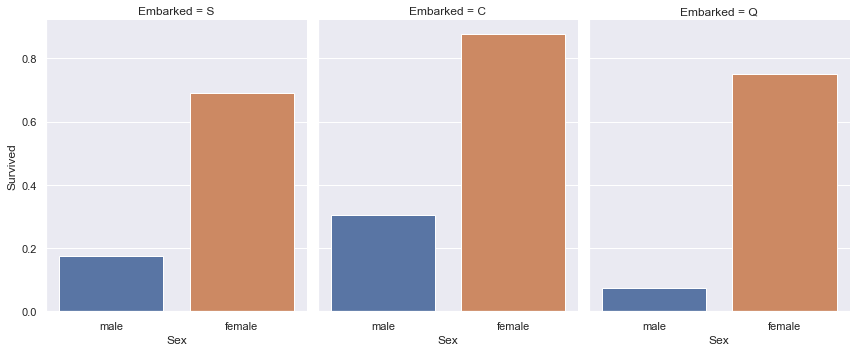

In [14]:
sns.catplot(x = 'Sex', y ='Survived', col = 'Embarked', data = train, kind = 'bar', palette = 'deep', ci=None, aspect=0.8)

In [15]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_alone,log_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022


### Summary based on visuals

1. Column `PassengerId` won't help us.
2. I've seen people use column `Name` cleverly like [here](https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial) but I won't be using in this notebook because:
    - Not important from prespective of our main objective.
    - Requires extra efforts.
    - Might not bring a huge change.
3. Now that we have created a new feature `Is_alone` using features `SibSp` and `Parch`, we can delete them from our dataset.
4. Probability of surviving was the most with:
    1. Passengers who were **young**.
    2. Passengers who paid more **Fare**.
    3. Passengers who were **Female**, had passenger class as **1** and boarded at **Cherbourg**.

In [16]:
train = train.drop(['PassengerId','Name','SibSp','Parch'], axis = 1)
test = test.drop(['Name','SibSp','Parch'], axis = 1)

In [17]:
train.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Is_alone,log_Fare
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,1,1.981001
1,1,1,female,38.0,PC 17599,71.2833,C85,C,1,4.266662
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022
3,1,1,female,35.0,113803,53.1000,C123,S,1,3.972177
4,0,3,male,35.0,373450,8.0500,NaN,S,0,2.085672
5,0,3,male,NaN,330877,8.4583,NaN,Q,0,2.135148
6,0,1,male,54.0,17463,51.8625,E46,S,0,3.948596
7,0,3,male,2.0,349909,21.0750,NaN,S,1,3.048088
8,1,3,female,27.0,347742,11.1333,NaN,S,1,2.409941
9,1,2,female,14.0,237736,30.0708,NaN,C,1,3.403555


In [18]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Is_alone
0,892,3,male,34.5,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,363272,7.0000,NaN,S,1
2,894,2,male,62.0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,3101298,12.2875,NaN,S,1
5,897,3,male,14.0,7538,9.2250,NaN,S,0
6,898,3,female,30.0,330972,7.6292,NaN,Q,0
7,899,2,male,26.0,248738,29.0000,NaN,S,1
8,900,3,female,18.0,2657,7.2292,NaN,C,0
9,901,3,male,21.0,A/4 48871,24.1500,NaN,S,1


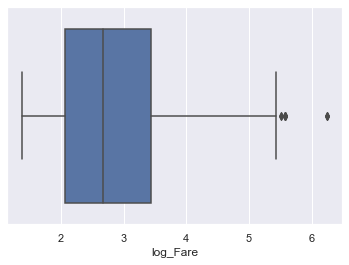

In [19]:
sns.boxplot(x = train['log_Fare'])

In [20]:
print('Train Data: ')
train.isnull().sum()

Train Data: 


Survived      0
Pclass        0
Sex           0
Age         177
Ticket        0
Fare          0
Cabin       687
Embarked      2
Is_alone      0
log_Fare      0
dtype: int64

In [21]:
print('Test Data: ')
test.isnull().sum()

Test Data: 


PassengerId      0
Pclass           0
Sex              0
Age             86
Ticket           0
Fare             1
Cabin          327
Embarked         0
Is_alone         0
dtype: int64

In [22]:
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
Is_alone      int64
log_Fare    float64
dtype: object

In [23]:
train.head(3)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Is_alone,log_Fare
0,0,3,male,22.0,A/5 21171,7.2500,NaN,S,1,1.981001
1,1,1,female,38.0,PC 17599,71.2833,C85,C,1,4.266662
2,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022


In [24]:
numerical = ['Pclass', 'Age', 'Is_alone', 'Fare']
categorical = ['Sex', 'Ticket', 'Cabin', 'Embarked']

In [25]:
features = numerical + categorical
target = ['Survived']

## Transforming the data
We will use combination of [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) with [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to carry out the necessary transformation on our data.

Transformers we are going to use:

|Data type|Transformer|
|:---|:---|
|Numerical|[IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) & [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)|
|Categorical|[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) & [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)|


We will use **most_frequent** strategy for categorical columns.

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer , SimpleImputer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [27]:
numerical_transformer = Pipeline(steps = [ ('iterative', IterativeImputer(max_iter = 10, random_state = 0)),
                                         ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps = [ ('imputer', SimpleImputer(strategy = 'most_frequent')),
                                            ('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(
    transformers = [
    ('num', numerical_transformer, numerical),
    ('cat', categorical_transformer, categorical)])

## Defining our models
we will be using two types of approaches:
1. Ensembling
2. RandomForestClassifier

In [28]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score

observations = pd.DataFrame()
classifiers = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 'RandomForestClassifier', 'AdaBoostClassifier', 'XGBoostClassifier', 'KNeighborsClassifier']
models = [ svm.SVC(kernel='linear'), 
                  svm.SVC(kernel='rbf'), 
                 LogisticRegression(), 
                 RandomForestClassifier(n_estimators=200, random_state=0),
                 AdaBoostClassifier(random_state = 0),
                 xgb.XGBClassifier(n_estimators=100),
                 KNeighborsClassifier()
                 ]
j = 0
for i in models:
    model = i
    cv = KFold(n_splits=6, random_state=0, shuffle=True)
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
    pipe.fit(train[features], np.ravel(train[target]))
    observations[classifiers[j]] = (cross_val_score(pipe, train[features], np.ravel(train[target]), scoring='accuracy', cv=cv))
    j = j+1

observations.T

/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aryamonani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/aryamonani/opt/anacon

,0,1,2,3,4,5
Linear SVM,0.852349,0.812081,0.838926,0.824324,0.824324,0.837838
Radial SVM,0.731544,0.744966,0.751678,0.810811,0.722973,0.662162
LogisticRegression,0.812081,0.791946,0.832215,0.804054,0.810811,0.844595
RandomForestClassifier,0.845638,0.812081,0.852349,0.864865,0.824324,0.824324
AdaBoostClassifier,0.818792,0.798658,0.818792,0.824324,0.777027,0.810811
XGBoostClassifier,0.838926,0.818792,0.832215,0.844595,0.777027,0.810811
KNeighborsClassifier,0.838926,0.758389,0.805369,0.837838,0.783784,0.797297


In [29]:
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

rand = RandomForestClassifier(n_estimators=200, random_state=0)
pipe_rand = Pipeline(steps=[('preprocessor', preprocessor),  ('model', rand)])

xgb = xgb.XGBClassifier(n_estimators=100)
pipe_xgb = Pipeline(steps=[('preprocessor', preprocessor),  ('model', xgb)])

linear_svm = svm.SVC(kernel='linear', C=0.1,gamma=10, probability=True)
pipe_linear = Pipeline(steps=[('preprocessor', preprocessor),  ('model', linear_svm)])


ensemble_all = VotingClassifier(estimators=[('Random Forest Classifier', pipe_rand),
                                                                         ('Linear_svm', pipe_linear),
                                                                        ('XGB', pipe_xgb)], 
                                                                        voting='soft', weights=[3,2,1])

ensemble_all.fit(train[features], np.ravel(train[target]))

VotingClassifier(estimators=[('Random Forest Classifier',
                              Pipeline(memory=None,
                                       steps=[('preprocessor',
                                               ColumnTransformer(n_jobs=None,
                                                                 remainder='drop',
                                                                 sparse_threshold=0.3,
                                                                 transformer_weights=None,
                                                                 transformers=[('num',
                                                                                Pipeline(memory=None,
                                                                                         steps=[('iterative',
                                                                                                 IterativeImputer(add_indicator=False,
                                                      

In [30]:
cross_validation_score = cross_val_score(ensemble_all, train[features], np.ravel(train[target]), scoring='accuracy', cv=cv)
print("K-Fold scores:", cross_validation_score,
      "\nMean:", round(cross_validation_score.mean(), 3),
     "\nMax:", round(cross_validation_score.max(), 3))

K-Fold scores: [0.81879195 0.81208054 0.82550336 0.83783784 0.79054054 0.81756757] 
Mean: 0.817 
Max: 0.838


In [31]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

model = RandomForestClassifier(n_estimators=200, random_state = 0)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

pipe.fit(train[features], np.ravel(train[target]))

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('iterative',
                                                                   IterativeImputer(add_indicator=False,
                                                                                    estimator=None,
                                                                                    imputation_order='ascending',
                                                                                    initial_strategy='mean',
                                                                                    max_iter=10,
                           

In [32]:
cross_validation_score_rand = cross_val_score(pipe, train[features], np.ravel(train[target]), scoring='accuracy', cv=cv)
print("K-Fold scores:", cross_validation_score_rand,
      "\nMean:", round(cross_validation_score_rand.mean(), 3),
     "\nMax:", round(cross_validation_score_rand.max(), 3))

K-Fold scores: [0.84563758 0.81208054 0.85234899 0.86486486 0.82432432 0.82432432] 
Mean: 0.837 
Max: 0.865


AttributeError: 'RandomForestClassifier' object has no attribute 'describe'